In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('HG=F.csv', parse_dates=['Date'])
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,2.8615,2.8645,2.8380,2.8385,2.8385,468
1,2015-01-02,2.8420,2.8420,2.8365,2.8385,2.8385,194
2,2015-01-05,2.8295,2.8295,2.7880,2.7930,2.7930,220
3,2015-01-06,2.7950,2.8060,2.7915,2.8040,2.8040,326
4,2015-01-07,2.7920,2.8090,2.7910,2.7960,2.7960,312


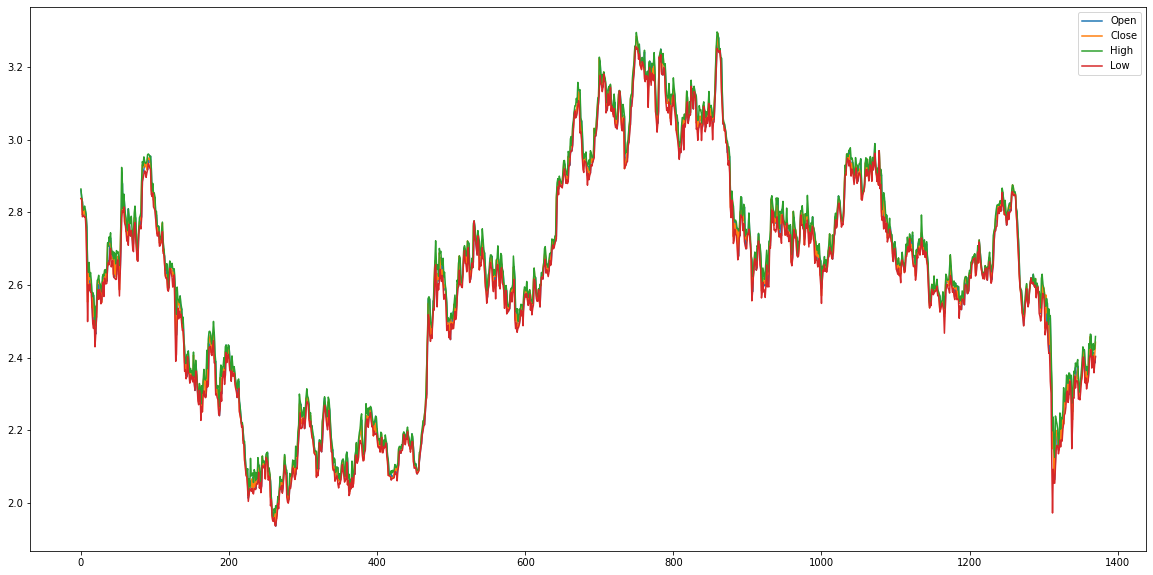

In [2]:
#plotting ohlc trends to see variations
data[['Open','Close','High','Low']].plot(figsize=(20,10))

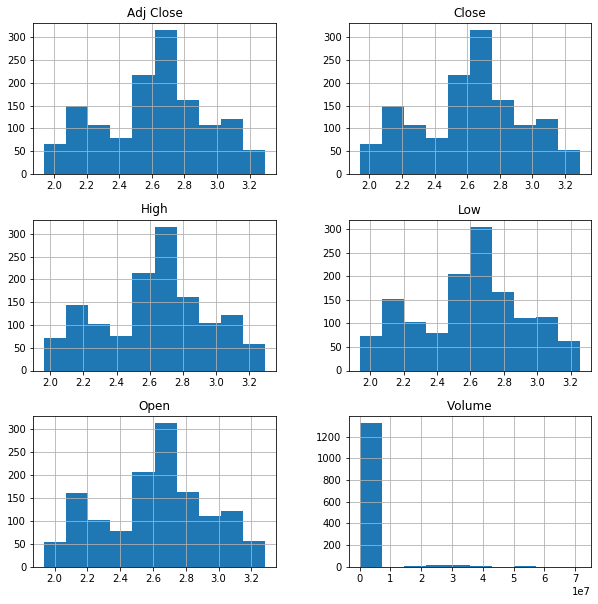

In [3]:
#histograms to see the distribution of ohlc
data.hist(figsize=(10,10))
plt.show()

In [4]:
#on to feature engineering now :)
#looking for missing values
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
#checking for outliers
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1.371000e+03
mean,2.615516,2.631922,2.597822,2.615701,2.615701,1.020865e+06
std,0.317253,0.317032,0.317475,0.317394,0.317394,5.908428e+06
min,1.936500,1.962500,1.936500,1.939500,1.939500,1.390000e+02
25%,2.363250,2.386000,2.348000,2.365250,2.365250,3.295000e+02
50%,2.642000,2.658000,2.626000,2.644000,2.644000,4.740000e+02
75%,2.805000,2.823500,2.790500,2.807500,2.807500,7.710000e+02
max,3.281500,3.297000,3.257000,3.293000,3.293000,7.163845e+07


In [6]:
#no need for us to move onto data processing since our data has no outliers.
#feature engineering now. the main aim now is to predict highest price for sell. this here will be done basing on the day_of_week, hour
#of the day, and previous days stock data.
#so lets check out our date format since the NN requires numerical data.
print(data.head()['Date'])

0   2014-12-31
1   2015-01-02
2   2015-01-05
3   2015-01-06
4   2015-01-07
Name: Date, dtype: datetime64[ns]


In [7]:
#so am now going to create new columns splitted into year month date day_of_week and hour
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek
data['hour'] = data['Date'].dt.hour
print(data.loc[:5, ['Date','year','month','day','day_of_week','hour']])

        Date  year  month  day  day_of_week  hour
0 2014-12-31  2014     12   31            2     0
1 2015-01-02  2015      1    2            4     0
2 2015-01-05  2015      1    5            0     0
3 2015-01-06  2015      1    6            1     0
4 2015-01-07  2015      1    7            2     0
5 2015-01-08  2015      1    8            3     0


In [8]:
#drop Date column
data = data.drop(['Date'], axis=1)

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day,day_of_week,hour
0,2.8615,2.8645,2.8380,2.8385,2.8385,468,2014,12,31,2,0
1,2.8420,2.8420,2.8365,2.8385,2.8385,194,2015,1,2,4,0
2,2.8295,2.8295,2.7880,2.7930,2.7930,220,2015,1,5,0,0
3,2.7950,2.8060,2.7915,2.8040,2.8040,326,2015,1,6,1,0
4,2.7920,2.8090,2.7910,2.7960,2.7960,312,2015,1,7,2,0


In [10]:
df = data.drop(['year','day','hour'], axis=1)
#now using df from now on
#df2 = df.set_index(['day_of_week'])
#df2.head()

In [11]:
X = df.loc[:,df.columns != 'High']
y = df.loc[:,'High']

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn import linear_model

In [14]:
linear = linear_model.LinearRegression()

In [15]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
acc = linear.score(X_test, y_test)
print(acc)

0.9987841400743526


In [17]:
# predicting on specific students
predictions = linear.predict(X_test)#gets a list of all predictions



In [18]:
print('coefficient: \n', linear.coef_)#each slope value
print('intercept; \n', linear.intercept_)#intercept of the line

coefficient: 
 [ 6.01659631e-01 -3.76563695e-01  3.87705081e-01  3.87705081e-01
  2.49493926e-10  1.16659917e-04  8.83105525e-05]
intercept; 
 0.006998062626687673


In [19]:
# Let's Plot LinearRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import numpy as np
def plot_learning_curve(estimator1,X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",label="Cross-validation score")
    ax1.set_title("Linear Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    


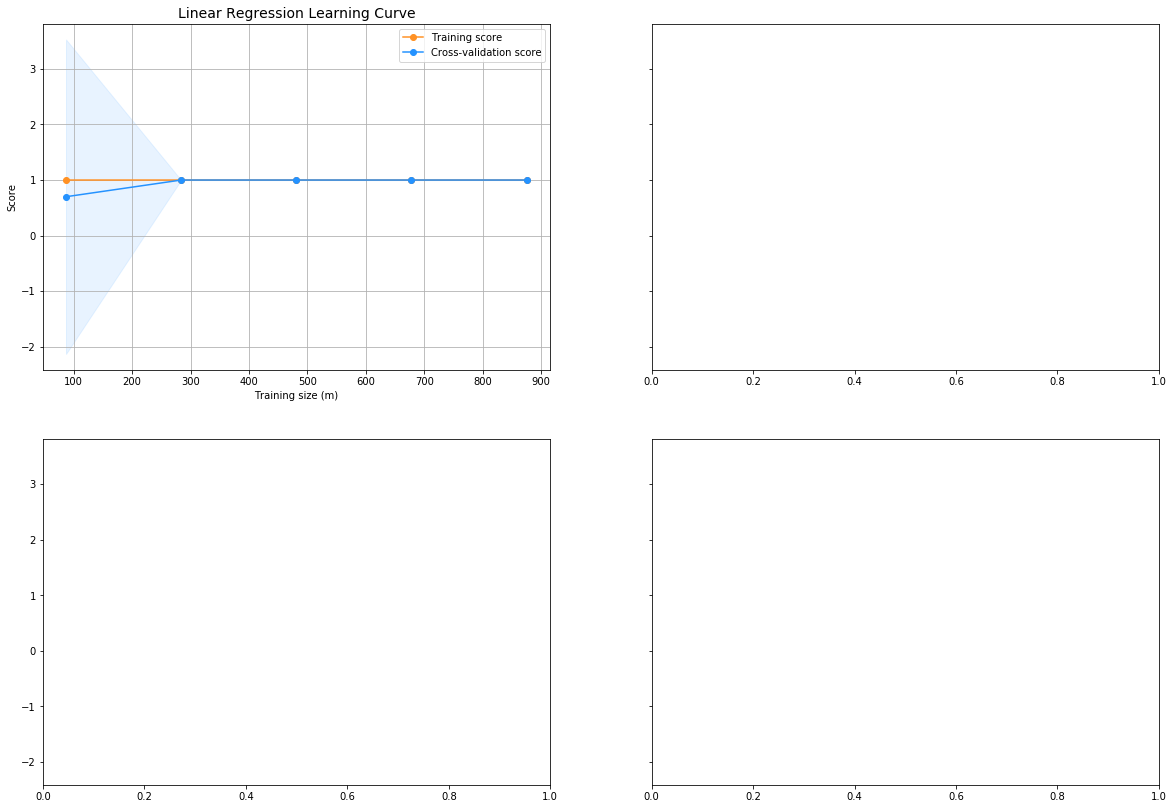

In [20]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(linear,X_train, y_train, cv=cv, n_jobs=4)

In [21]:
# a data frame with actual and predicted values of High
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': predictions.flatten()})
evaluate.head(10)
#THIS IS SHOWING THE PREDICTED HIGH PRICE VS THE ACTUAL HIGH PRICE

,Actual,Predicted
0,2.6350,2.619744
1,3.2970,3.283529
2,2.3750,2.366966
3,2.9430,2.946064
4,2.1550,2.165808
5,2.5845,2.574426
6,2.7240,2.735996
7,3.2630,3.266302
8,3.0775,3.078973
9,2.8315,2.836521
